**In this notebook we are trying to classify between static and dynamic files for the same stimulus**

Contains experiments using 1D-CNN and LSTM models on the single trial files (large dataset). The goal was to see if these models could classify between static and dynamic better than fear vs anger using K Fold classification. Data was scaled for some of the experiments.

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Files are of the formate FM#_XY**

**Where # is participant number, X=1 for fear or 2 for anger, and Y=1 for dynamic or 2 for static**

**Imports**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers
#from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, Normalizer
import numpy as np

**Load in large dataset** 

**Make sure it's loading in fear and anger not static and dynamic**

In [ ]:
%cd drive/My \Drive/
%run LoadData.ipynb

**Visualization Functions**

In [ ]:
#helper function for plotting comparison of two models
def plot_graphs(history, hist2, metric):
  plt.plot(history.history[metric])
  plt.plot(hist2.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'2nd model ' + metric])
  plt.show()

In [ ]:
#helper function for plotting graphs of our results
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
#for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    diff = cm.max() - cm.min()
    thresh = cm.min() + (diff/2.)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            fontsize='xx-large',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Create Models**

In [ ]:
#creates 1D-CNN Model
def create_cnn_model():
  #variables to be used for input shape
  ROWS = 1101
  COLS = 64

  model = Sequential()
  #add 2 1D Convolution Layers
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(ROWS, COLS)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(Conv1D(filters=64, kernel_size=5, activation='relu')) 
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu', name='first_dense'))
  model.add(Dense(64, activation='relu', name='2nd_dense'))
  model.add(Dense(1, activation='sigmoid'))

  #compile model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  return model

In [ ]:
#Creates LSTM Model
def create_lstm_model():
  #variables to be used for input shape
  ROWS = 1101
  COLS = 64
  
  #Double Bidirectional LSTM layer model
  model = tf.keras.Sequential([
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])
  #compile model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
  
  return model

**K Cross Validation**

**Scale files**

In [ ]:
for i in range(anger_trials.shape[0]):
    scaler = StandardScaler()
    anger_trials[i, :, :] = scaler.fit_transform(anger_trials[i, :, :]) 

print (anger_trials.shape)

(2862, 1101, 64)


In [ ]:
for i in range(fear_trials.shape[0]):
    scaler = StandardScaler()
    fear_trials[i, :, :] = scaler.fit_transform(fear_trials[i, :, :]) 

print (fear_trials.shape)

(2838, 1101, 64)


Train on 2128 samples, validate on 710 samples
Epoch 1/10
 - 8s - loss: 0.8050 - accuracy: 0.5108 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/10
 - 1s - loss: 0.6804 - accuracy: 0.5616 - val_loss: 0.6746 - val_accuracy: 0.5761
Epoch 3/10
 - 1s - loss: 0.6470 - accuracy: 0.6189 - val_loss: 0.6654 - val_accuracy: 0.5901
Epoch 4/10
 - 1s - loss: 0.5922 - accuracy: 0.6795 - val_loss: 0.6642 - val_accuracy: 0.6113
Epoch 5/10
 - 1s - loss: 0.5376 - accuracy: 0.7326 - val_loss: 0.6923 - val_accuracy: 0.5958
Epoch 6/10
 - 1s - loss: 0.4596 - accuracy: 0.7754 - val_loss: 0.7668 - val_accuracy: 0.6127
Epoch 7/10
 - 1s - loss: 0.3736 - accuracy: 0.8289 - val_loss: 0.8880 - val_accuracy: 0.5732
Epoch 8/10
 - 1s - loss: 0.2916 - accuracy: 0.8750 - val_loss: 0.9844 - val_accuracy: 0.5915
Epoch 9/10
 - 1s - loss: 0.2197 - accuracy: 0.9154 - val_loss: 1.0477 - val_accuracy: 0.5859
Epoch 10/10
 - 1s - loss: 0.1802 - accuracy: 0.9295 - val_loss: 1.1842 - val_accuracy: 0.5915


Train on 2128 sample

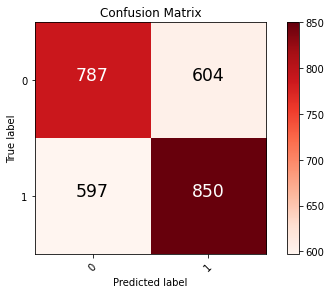

In [ ]:
#fear files
n_epochs = 10
n_splits = 4
batch_size = 32
verbose = 2

class_names = [0, 1]

accuracies = []
losses = []

predicts = []
trues = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=None)

for train_index, test_index in kfold.split(fear_trials):
  #split data into X and y training and test sets
  fear_train, fear_test = fear_trials[train_index], fear_trials[test_index]
  label_train, label_test = fear_labels[train_index], fear_labels[test_index]

  #build model
  model = create_cnn_model()
  
  #fit model
  history = model.fit(fear_train, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(fear_test, label_test))
  
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = label_test
  y_pred_prob = model.predict(fear_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)
  
  #evaluate model
  loss, accuracy = model.evaluate(fear_test, label_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

In [ ]:
#anger files
n_epochs = 10
n_splits = 4
batch_size = 32
verbose = 2

class_names = [0, 1]

accuracies = []
losses = []

predicts = []
trues = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=None)

for train_index, test_index in kfold.split(anger_trials):
  #split data into X and y training and test sets
  anger_train, anger_test = anger_trials[train_index], anger_trials[test_index]
  label_train, label_test = anger_labels[train_index], anger_labels[test_index]

  #build model
  model = create_cnn_model()
  
  #fit model
  history = model.fit(anger_train, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(anger_test, label_test))
  
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = label_test
  y_pred_prob = model.predict(anger_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)
  
  #evaluate model
  loss, accuracy = model.evaluate(anger_test, label_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

Train on 2146 samples, validate on 716 samples
Epoch 1/10
 - 1s - loss: 0.7552 - accuracy: 0.5149 - val_loss: 0.6915 - val_accuracy: 0.5740
Epoch 2/10
 - 1s - loss: 0.6757 - accuracy: 0.5741 - val_loss: 0.6868 - val_accuracy: 0.5377
Epoch 3/10
 - 1s - loss: 0.6393 - accuracy: 0.6370 - val_loss: 0.6847 - val_accuracy: 0.5587
Epoch 4/10
 - 1s - loss: 0.5990 - accuracy: 0.6938 - val_loss: 0.7063 - val_accuracy: 0.5573
Epoch 5/10
 - 1s - loss: 0.5323 - accuracy: 0.7339 - val_loss: 0.7239 - val_accuracy: 0.5447
Epoch 6/10
 - 1s - loss: 0.4404 - accuracy: 0.7940 - val_loss: 0.8196 - val_accuracy: 0.5740
Epoch 7/10
 - 1s - loss: 0.3357 - accuracy: 0.8486 - val_loss: 1.0106 - val_accuracy: 0.5405
Epoch 8/10
 - 1s - loss: 0.2726 - accuracy: 0.8858 - val_loss: 1.0222 - val_accuracy: 0.5517
Epoch 9/10
 - 1s - loss: 0.1531 - accuracy: 0.9441 - val_loss: 1.2604 - val_accuracy: 0.5656
Epoch 10/10
 - 1s - loss: 0.0996 - accuracy: 0.9599 - val_loss: 1.4955 - val_accuracy: 0.5321




**K fold with LSTM**

Epoch 1/15
67/67 - 6s - loss: 0.7045 - accuracy: 0.4944 - val_loss: 0.7015 - val_accuracy: 0.4634
Epoch 2/15
67/67 - 5s - loss: 0.6797 - accuracy: 0.5132 - val_loss: 0.7110 - val_accuracy: 0.4634
Epoch 3/15
67/67 - 5s - loss: 0.6649 - accuracy: 0.5381 - val_loss: 0.7017 - val_accuracy: 0.4676
Epoch 4/15
67/67 - 5s - loss: 0.6465 - accuracy: 0.5634 - val_loss: 0.7068 - val_accuracy: 0.4775
Epoch 5/15
67/67 - 5s - loss: 0.6323 - accuracy: 0.5926 - val_loss: 0.7184 - val_accuracy: 0.4803
Epoch 6/15
67/67 - 5s - loss: 0.6131 - accuracy: 0.6264 - val_loss: 0.7280 - val_accuracy: 0.4817
Epoch 7/15
67/67 - 5s - loss: 0.5854 - accuracy: 0.6452 - val_loss: 0.7545 - val_accuracy: 0.4930
Epoch 8/15
67/67 - 5s - loss: 0.5495 - accuracy: 0.7054 - val_loss: 0.7798 - val_accuracy: 0.4915
Epoch 9/15
67/67 - 5s - loss: 0.5222 - accuracy: 0.7237 - val_loss: 0.7872 - val_accuracy: 0.4859
Epoch 10/15
67/67 - 5s - loss: 0.4943 - accuracy: 0.7561 - val_loss: 0.8317 - val_accuracy: 0.5141
Epoch 11/15
67/67 -

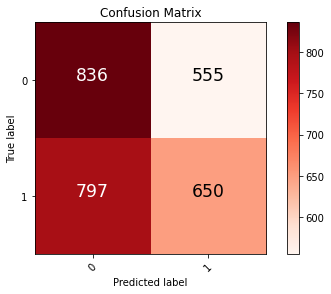

In [ ]:
#fear files
n_epochs = 15
n_splits = 4
batch_size = 32
verbose = 2

class_names = [0, 1]

accuracies = []
losses = []

predicts = []
trues = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=None)

for train_index, test_index in kfold.split(fear_trials):
  #split data into X and y training and test sets
  fear_train, fear_test = fear_trials[train_index], fear_trials[test_index]
  label_train, label_test = fear_labels[train_index], fear_labels[test_index]

  #build model
  model = create_lstm_model()
  
  #fit model
  history = model.fit(fear_train, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(fear_test, label_test))
  
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = label_test
  y_pred_prob = model.predict(fear_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)
  
  #evaluate model
  loss, accuracy = model.evaluate(fear_test, label_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

Train on 2128 samples, validate on 710 samples
Epoch 1/10
 - 8s - loss: 0.8050 - accuracy: 0.5108 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/10
 - 1s - loss: 0.6804 - accuracy: 0.5616 - val_loss: 0.6746 - val_accuracy: 0.5761
Epoch 3/10
 - 1s - loss: 0.6470 - accuracy: 0.6189 - val_loss: 0.6654 - val_accuracy: 0.5901
Epoch 4/10
 - 1s - loss: 0.5922 - accuracy: 0.6795 - val_loss: 0.6642 - val_accuracy: 0.6113
Epoch 5/10
 - 1s - loss: 0.5376 - accuracy: 0.7326 - val_loss: 0.6923 - val_accuracy: 0.5958
Epoch 6/10
 - 1s - loss: 0.4596 - accuracy: 0.7754 - val_loss: 0.7668 - val_accuracy: 0.6127
Epoch 7/10
 - 1s - loss: 0.3736 - accuracy: 0.8289 - val_loss: 0.8880 - val_accuracy: 0.5732
Epoch 8/10
 - 1s - loss: 0.2916 - accuracy: 0.8750 - val_loss: 0.9844 - val_accuracy: 0.5915
Epoch 9/10
 - 1s - loss: 0.2197 - accuracy: 0.9154 - val_loss: 1.0477 - val_accuracy: 0.5859
Epoch 10/10
 - 1s - loss: 0.1802 - accuracy: 0.9295 - val_loss: 1.1842 - val_accuracy: 0.5915


Train on 2128 sample

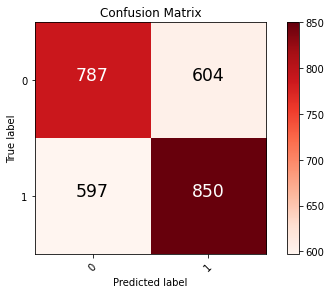

In [ ]:
#anger files
n_epochs = 10
n_splits = 4
batch_size = 32
verbose = 2

class_names = [0, 1]

accuracies = []
losses = []

predicts = []
trues = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=None)

for train_index, test_index in kfold.split(anger_trials):
  #split data into X and y training and test sets
  anger_train, anger_test = anger_trials[train_index], anger_trials[test_index]
  label_train, label_test = anger_labels[train_index], anger_labels[test_index]

  #build model
  model = create_lstm_model()
  
  #fit model
  history = model.fit(anger_train, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(anger_test, label_test))
  
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = label_test
  y_pred_prob = model.predict(anger_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)
  
  #evaluate model
  loss, accuracy = model.evaluate(anger_test, label_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

**Transfer Learning Models**

In [ ]:
#returns a model with transfer learning applied
def get_tl_model(base_model):
  model = Sequential()
  for layer in base_model.layers:
    #once we get to dense layers have fresh ones added
    if layer.name == 'first_dense':
      model.add(Dense(64, activation='relu', name='first_dense'))
      model.add(Dense(64, activation='relu', name='second_dense'))
      model.add(Dense(1, activation='sigmoid'))
      break
    #copy layers from base model and freeze them
    model.add(layer)
    layer.trainable = False

  model.summary()
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
  
  return model

**Apply Transfer Learning**

In [ ]:
#train on n-1 users
FM01 = fear_trials[np.where(fear_groups == '01')]
FM01_labels = fear_labels[np.where(fear_groups == '01')]

train_set = fear_trials[(np.where(fear_groups != '01'))]
test_set = FM01

label_train = fear_labels[(np.where(fear_groups != '01'))]
label_test = FM01_labels

#vars for training
n_epochs = 25
batch_size = 8
verbose = 2

class_names = [0, 1]

base_model = create_base_model()

#fit model
history = base_model.fit(train_set, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size)

Epoch 1/25
 - 9s - loss: 1.0053 - accuracy: 0.5131
Epoch 2/25
 - 3s - loss: 0.6880 - accuracy: 0.5646
Epoch 3/25
 - 3s - loss: 0.6918 - accuracy: 0.5787
Epoch 4/25
 - 3s - loss: 0.7082 - accuracy: 0.5746
Epoch 5/25
 - 3s - loss: 0.6980 - accuracy: 0.5731
Epoch 6/25
 - 3s - loss: 0.6878 - accuracy: 0.5813
Epoch 7/25
 - 3s - loss: 0.6918 - accuracy: 0.5724
Epoch 8/25
 - 3s - loss: 0.6639 - accuracy: 0.5968
Epoch 9/25
 - 3s - loss: 0.6433 - accuracy: 0.6346
Epoch 10/25
 - 3s - loss: 0.6110 - accuracy: 0.6505
Epoch 11/25
 - 3s - loss: 0.5804 - accuracy: 0.6786
Epoch 12/25
 - 3s - loss: 0.5488 - accuracy: 0.7268
Epoch 13/25
 - 3s - loss: 0.4569 - accuracy: 0.7771
Epoch 14/25
 - 3s - loss: 0.4001 - accuracy: 0.8234
Epoch 15/25
 - 3s - loss: 0.2904 - accuracy: 0.8663
Epoch 16/25
 - 3s - loss: 0.2926 - accuracy: 0.8860
Epoch 17/25
 - 3s - loss: 0.2246 - accuracy: 0.9071
Epoch 18/25
 - 3s - loss: 0.2135 - accuracy: 0.9256
Epoch 19/25
 - 3s - loss: 0.1532 - accuracy: 0.9411
Epoch 20/25
 - 3s - l

**K fold with transfer learning**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1099, 64)          12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 549, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 549, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 545, 64)           20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 272, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 17408)             0         
_________________________________________________________________
first_dense (Dense)          (None, 64)               

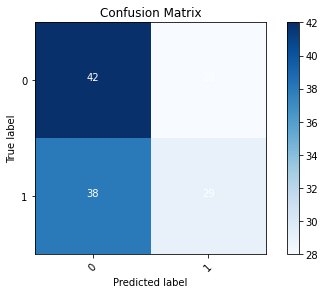

In [ ]:
n_splits = 4
n_epochs = 15
batch_size = 1

trues = []
preds = []
losses = []
accuracies = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=None)

for train_index, test_index in kfold.split(test_set):
  X_train, X_test = test_set[train_index], test_set[test_index]
  y_train, y_test = label_test[train_index], label_test[test_index]
  #apply transfer learning to base model
  model = get_tl_model(base_model)

  model.fit(X_train, y_train, epochs=n_epochs, verbose=verbose, batch_size=batch_size,
                 validation_data = (X_test, y_test))
  
  #predictions
  y_true = y_test
  y_pred_prob = model.predict(X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #append to list
  trues.extend(y_true)
  preds.extend(y_pred)

  #evaluate model
  loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(acc * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", acc*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, preds, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

****************************************************************************

**Scale data**

In [ ]:
for i in range(anger_nps.shape[0]):
    scaler = StandardScaler()
    anger_nps[i, :, :] = scaler.fit_transform(anger_nps[i, :, :]) 

print (anger_nps.shape)

(47, 401, 64)


In [ ]:
for i in range(fear_nps.shape[0]):
    scaler = StandardScaler()
    fear_nps[i, :, :] = scaler.fit_transform(fear_nps[i, :, :]) 

print (fear_nps.shape)

(46, 401, 64)


**Group K Cross Validation with CNN**

Train on 36 samples, validate on 10 samples
Epoch 1/15
 - 7s - loss: 0.9087 - accuracy: 0.5000 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/15
 - 0s - loss: 0.7282 - accuracy: 0.4167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
 - 0s - loss: 0.7056 - accuracy: 0.4167 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/15
 - 0s - loss: 0.7082 - accuracy: 0.4722 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/15
 - 0s - loss: 0.7024 - accuracy: 0.3889 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/15
 - 0s - loss: 0.7093 - accuracy: 0.4167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
 - 0s - loss: 0.7056 - accuracy: 0.5278 - val_loss: 0.7019 - val_accuracy: 0.5000
Epoch 8/15
 - 0s - loss: 0.6966 - accuracy: 0.5833 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 9/15
 - 0s - loss: 0.6968 - accuracy: 0.4167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/15
 - 0s - loss: 0.7094 - accuracy: 0.4167 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 11/15
 - 0s - loss:

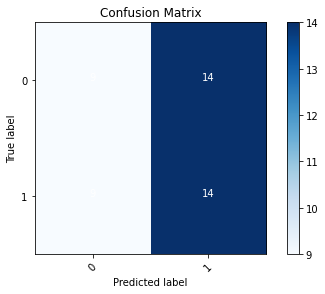

In [ ]:
#fear files
n_epochs = 15
n_splits = 5
batch_size = 1
verbose = 2

class_names = [0, 1]

accuracies = []
losses = []

predicts = []
trues = []

split_no = 1

group_kfold = GroupKFold(n_splits=n_splits)

for train_index, test_index in group_kfold.split(fear_nps, fear_labels, fear_groups):
  #split data into X and y training and test sets
  fear_X_train, fear_X_test = fear_nps[train_index], fear_nps[test_index]
  fear_y_train, fear_y_test = fear_labels[train_index], fear_labels[test_index]

  #build model
  model = create_cnn_model()
  
  #fit model
  history = model.fit(fear_X_train, fear_y_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(fear_X_test, fear_y_test))
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = fear_y_test
  y_pred_prob = model.predict(fear_X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)

  print("Training group labels: ", fear_groups[train_index])
  print("Testing group labels: ", fear_groups[test_index])
  print("True labels: ", y_true)
  print("Pred labels: ", y_pred)
  print ("\n")

  #evaluate model
  loss, accuracy = model.evaluate(fear_X_test, fear_y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  print("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

#print graphs to see best parameter values
#plot_metrics(history, 'accuracy')
#plot_metrics(history, 'loss')

Train on 38 samples, validate on 9 samples
Epoch 1/15
 - 0s - loss: 0.8935 - accuracy: 0.3421 - val_loss: 0.7013 - val_accuracy: 0.4444
Epoch 2/15
 - 0s - loss: 0.7314 - accuracy: 0.3947 - val_loss: 0.6919 - val_accuracy: 0.5556
Epoch 3/15
 - 0s - loss: 0.7004 - accuracy: 0.4211 - val_loss: 0.6924 - val_accuracy: 0.5556
Epoch 4/15
 - 0s - loss: 0.7056 - accuracy: 0.6053 - val_loss: 0.6957 - val_accuracy: 0.4444
Epoch 5/15
 - 0s - loss: 0.7013 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4444
Epoch 6/15
 - 0s - loss: 0.7027 - accuracy: 0.3684 - val_loss: 0.6936 - val_accuracy: 0.4444
Epoch 7/15
 - 0s - loss: 0.6995 - accuracy: 0.4474 - val_loss: 0.6978 - val_accuracy: 0.4444
Epoch 8/15
 - 0s - loss: 0.7040 - accuracy: 0.4474 - val_loss: 0.6953 - val_accuracy: 0.4444
Epoch 9/15
 - 0s - loss: 0.7018 - accuracy: 0.4211 - val_loss: 0.6954 - val_accuracy: 0.4444
Epoch 10/15
 - 0s - loss: 0.6977 - accuracy: 0.5263 - val_loss: 0.6944 - val_accuracy: 0.4444
Epoch 11/15
 - 0s - loss: 

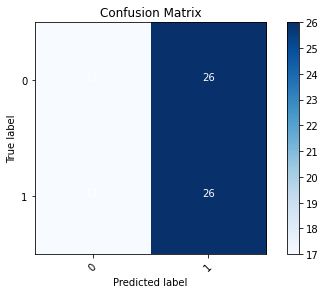

In [ ]:
#anger files
n_epochs = 15
n_splits = 5
batch_size = 1
verbose = 2

accuracies = []
losses = []

split_no = 1

group_kfold = GroupKFold(n_splits=n_splits)

for train_index, test_index in group_kfold.split(anger_nps, anger_labels, anger_groups):
  #split data into X and y training and test sets
  anger_X_train, anger_X_test = anger_nps[train_index], anger_nps[test_index]
  anger_y_train, anger_y_test = anger_labels[train_index], anger_labels[test_index]

  #build model
  model = create_cnn_model()
  
  #fit model
  history = model.fit(anger_X_train, anger_y_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(anger_X_test, anger_y_test))
  
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = fear_y_test
  y_pred_prob = model.predict(fear_X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)

  print("True labels: ", y_true)
  print("Pred labels: ", y_pred)
  print ("\n")

  #evaluate model
  loss, accuracy = model.evaluate(anger_X_test, anger_y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  print("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

#print graphs to see best parameter values
#plot_metrics(history, 'accuracy')
#plot_metrics(history, 'loss')

**K Cross Validation with LSTM**

In [ ]:
#fear files
n_epochs = 15
n_splits = 10
batch_size = 1
verbose = 0

class_names = [0, 1]

accuracies = []
losses = []

split_no = 1

group_kfold = GroupKFold(n_splits=n_splits)

for train_index, test_index in group_kfold.split(fear_nps, fear_labels, fear_groups):
  #split data into X and y training and test sets
  fear_X_train, fear_X_test = fear_nps[train_index], fear_nps[test_index]
  fear_y_train, fear_y_test = fear_labels[train_index], fear_labels[test_index]

  #build model
  model = create_lstm_model()
  
  #fit model
  history = model.fit(fear_X_train, fear_y_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(fear_X_test, fear_y_test))
  #evaluate model
  loss, accuracy = model.evaluate(fear_X_test, fear_y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  print("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

#print graphs to see best parameter values
#plot_metrics(history, 'accuracy')
#plot_metrics(history, 'loss')

In [ ]:
#anger files
n_epochs = 15
n_splits = 10
batch_size = 1
verbose = 0

accuracies = []
losses = []

split_no = 1

group_kfold = GroupKFold(n_splits=n_splits)

for train_index, test_index in group_kfold.split(anger_nps, anger_labels, anger_groups):
  #split data into X and y training and test sets
  anger_X_train, anger_X_test = anger_nps[train_index], anger_nps[test_index]
  anger_y_train, anger_y_test = anger_labels[train_index], anger_labels[test_index]

  #build model
  model = create_lstm_model()
  
  #fit model
  history = model.fit(anger_X_train, anger_y_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(anger_X_test, anger_y_test))
  #evaluate model
  loss, accuracy = model.evaluate(anger_X_test, anger_y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  print("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#print graphs to see best parameter values
plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

**EEG Models**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling2D, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv1D, SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout1D, SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from sklearn.model_selection import GroupKFold, KFold
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer

In [ ]:
#transpose array
fear_array = fear_trials.swapaxes(1,2)
fear_array.shape

(2838, 64, 1101)

In [ ]:
#transpose array
anger_array = anger_trials.swapaxes(1,2)
anger_array.shape

(2862, 64, 1101)

In [ ]:
#scale data
for i in range(fear_trials.shape[0]):
    scaler = StandardScaler()
    fear_trials[i, :, :] = scaler.fit_transform(fear_trials[i, :, :]) 

print (fear_trials.shape)

(2838, 1101, 64)


In [ ]:
#scale data
for i in range(anger_trials.shape[0]):
    scaler = StandardScaler()
    anger_trials[i, :, :] = scaler.fit_transform(anger_trials[i, :, :]) 

print (anger_trials.shape)

(2862, 1101, 64)


In [ ]:
def EEGNet(nb_classes, Chans = 64, Samples = 128, 
             dropoutRate = 0.5, kernLength = 64, F1 = 8, 
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout'):
    """ Keras Implementation of EEGNet
    http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta
    Note that this implements the newest version of EEGNet and NOT the earlier
    version (version v1 and v2 on arxiv). We strongly recommend using this
    architecture as it performs much better and has nicer properties than
    our earlier version. For example:
        
        1. Depthwise Convolutions to learn spatial filters within a 
        temporal convolution. The use of the depth_multiplier option maps 
        exactly to the number of spatial filters learned within a temporal
        filter. This matches the setup of algorithms like FBCSP which learn 
        spatial filters within each filter in a filter-bank. This also limits 
        the number of free parameters to fit when compared to a fully-connected
        convolution. 
        
        2. Separable Convolutions to learn how to optimally combine spatial
        filters across temporal bands. Separable Convolutions are Depthwise
        Convolutions followed by (1x1) Pointwise Convolutions. 
        
    
    While the original paper used Dropout, we found that SpatialDropout2D 
    sometimes produced slightly better results for classification of ERP 
    signals. However, SpatialDropout2D significantly reduced performance 
    on the Oscillatory dataset (SMR, BCI-IV Dataset 2A). We recommend using
    the default Dropout in most cases.
        
    Assumes the input signal is sampled at 128Hz. If you want to use this model
    for any other sampling rate you will need to modify the lengths of temporal
    kernels and average pooling size in blocks 1 and 2 as needed (double the 
    kernel lengths for double the sampling rate, etc). Note that we haven't 
    tested the model performance with this rule so this may not work well. 
    
    The model with default parameters gives the EEGNet-8,2 model as discussed
    in the paper. This model should do pretty well in general, although it is
	advised to do some model searching to get optimal performance on your
	particular dataset.
    We set F2 = F1 * D (number of input filters = number of output filters) for
    the SeparableConv2D layer. We haven't extensively tested other values of this
    parameter (say, F2 < F1 * D for compressed learning, and F2 > F1 * D for
    overcomplete). We believe the main parameters to focus on are F1 and D. 
    Inputs:
        
      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer. We found
                        that setting this to be half the sampling rate worked
                        well in practice. For the SMR dataset in particular
                        since the data was high-passed at 4Hz we used a kernel
                        length of 32.     
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. Default: F1 = 8, F2 = F1 * D. 
      D               : number of spatial filters to learn within each temporal
                        convolution. Default: D = 2
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.
    """
    
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    
    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization(axis = 1)(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False, 
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization(axis = 1)(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)
    
    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization(axis = 1)(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)
        
    flatten      = Flatten(name = 'flatten')(block2)
    
    dense        = Dense(nb_classes, name = 'dense', 
                         kernel_constraint = max_norm(norm_rate))(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input1, outputs=softmax)

In [ ]:
#fear files 
n_epochs = 25
n_splits = 4
batch_size = 32
verbose = 2

class_names = [0, 1]

accuracies = []
losses = []

predicts = []
trues = []

split_no = 1
splits = []

#make static trials 4D so it is compatible with Conv2D (trials, rows, channels, 1)
fear_4D_trials = np.expand_dims(fear_array, axis=3)

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=None)

for train_index, test_index in kfold.split(fear_4D_trials):
  #split data into X and y training and test sets
  static_X_train, static_X_test = fear_4D_trials[train_index], fear_4D_trials[test_index]
  static_y_train, static_y_test = fear_labels[train_index], fear_labels[test_index]

  #build model
  model = EEGNet(2, Chans=64, Samples=1101)#, kernLength=7, dropoutRate=0.2) 
  #compile model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
  #fit model
  history = model.fit(static_X_train, static_y_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(static_X_test, static_y_test))
  
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = static_y_test
  y_pred_prob = model.predict(static_X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)

  #evaluate model
  loss, accuracy = model.evaluate(static_X_test, static_y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

#print graphs to see best parameter values
#plot_metrics(history, 'loss')
#plot_metrics(history, 'accuracy')

Epoch 1/25
67/67 - 3s - loss: 0.6999 - accuracy: 0.4878 - val_loss: 0.6932 - val_accuracy: 0.4901
Epoch 2/25
67/67 - 2s - loss: 0.6934 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 3/25
67/67 - 2s - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 4/25
67/67 - 2s - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5352
Epoch 5/25
67/67 - 2s - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5141
Epoch 6/25
67/67 - 2s - loss: 0.6932 - accuracy: 0.4901 - val_loss: 0.6931 - val_accuracy: 0.5141
Epoch 7/25
67/67 - 2s - loss: 0.6932 - accuracy: 0.4859 - val_loss: 0.6931 - val_accuracy: 0.5197
Epoch 8/25
67/67 - 2s - loss: 0.6931 - accuracy: 0.4930 - val_loss: 0.6931 - val_accuracy: 0.5239
Epoch 9/25
67/67 - 2s - loss: 0.6931 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.5211
Epoch 10/25
67/67 - 2s - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 11/25
67/67 -

In [ ]:
#anger files 
n_epochs = 25
n_splits = 4
batch_size = 32
verbose = 2

class_names = [0, 1]

accuracies = []
losses = []

predicts = []
trues = []

split_no = 1
splits = []

#make static trials 4D so it is compatible with Conv2D (trials, rows, channels, 1)
anger_4D_trials = np.expand_dims(anger_array, axis=3)

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=None)

for train_index, test_index in kfold.split(anger_4D_trials):
  #split data into X and y training and test sets
  static_X_train, static_X_test = anger_4D_trials[train_index], anger_4D_trials[test_index]
  static_y_train, static_y_test = anger_labels[train_index], anger_labels[test_index]

  #build model
  model = EEGNet(2, Chans=64, Samples=1101, kernLength=5, dropoutRate=0.2) 
  #compile model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
  #fit model
  history = model.fit(static_X_train, static_y_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(static_X_test, static_y_test))
  
  #add extra print for spacing
  print ("\n")
  #predict labels for confusion matrix
  y_true = static_y_test
  y_pred_prob = model.predict(static_X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #add true and predicted labels to arrays
  trues.extend(y_true)
  predicts.extend(y_pred)

  #evaluate model
  loss, accuracy = model.evaluate(static_X_test, static_y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(accuracy * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", accuracy*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, predicts, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

#print graphs to see best parameter values
#plot_metrics(history, 'loss')
#plot_metrics(history, 'accuracy')

Epoch 1/25
68/68 - 3s - loss: 0.6971 - accuracy: 0.5103 - val_loss: 0.6932 - val_accuracy: 0.5168
Epoch 2/25
68/68 - 2s - loss: 0.6935 - accuracy: 0.4823 - val_loss: 0.6932 - val_accuracy: 0.5223
Epoch 3/25
68/68 - 2s - loss: 0.6933 - accuracy: 0.5280 - val_loss: 0.6932 - val_accuracy: 0.5154
Epoch 4/25
68/68 - 2s - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.4721
Epoch 5/25
68/68 - 2s - loss: 0.6932 - accuracy: 0.5079 - val_loss: 0.6931 - val_accuracy: 0.4972
Epoch 6/25
68/68 - 2s - loss: 0.6932 - accuracy: 0.5103 - val_loss: 0.6931 - val_accuracy: 0.4986
Epoch 7/25
68/68 - 2s - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 8/25
68/68 - 2s - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5154
Epoch 9/25
68/68 - 2s - loss: 0.6931 - accuracy: 0.4832 - val_loss: 0.6931 - val_accuracy: 0.5182
Epoch 10/25
68/68 - 2s - loss: 0.6931 - accuracy: 0.5093 - val_loss: 0.6931 - val_accuracy: 0.4469
Epoch 11/25
68/68 -

**Transfer Learning Experiments**

**Transfer Learning Model**

In [ ]:
#returns a model with transfer learning applied
def get_tl_model(base_model):
  model = Sequential()
  for layer in base_model.layers:
    #once we get to dense layers have fresh ones added
    if layer.name == 'first_dense':
      model.add(Dense(64, activation='relu', name='first_dense'))
      model.add(Dense(64, activation='relu', name='second_dense'))
      model.add(Dense(1, activation='sigmoid'))
      break
    #copy layers from base model and freeze them
    model.add(layer)
    layer.trainable = False

  #model.summary()
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
  
  return model

**CNN model**

In [ ]:
#test set is FM01
train_set = anger_trials[(np.where(anger_groups != '01'))]
test_set = anger_trials[np.where(anger_groups == '01')] 

label_train = anger_labels[(np.where(anger_groups != '01'))]
label_test = anger_labels[(np.where(anger_groups == '01'))] 

#vars for training
n_epochs = 25
batch_size = 8
verbose = 2

class_names = [0, 1]

base_model = create_cnn_model()

#fit model
history = base_model.fit(train_set, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size)

In [ ]:
n_splits = 5
n_epochs = 10
batch_size = 1

trues = []
preds = []
losses = []
accuracies = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, random_state=None, shuffle=True)

for train_index, test_index in kfold.split(test_set):
  X_train, X_test = test_set[train_index], test_set[test_index]
  y_train, y_test = label_test[train_index], label_test[test_index]
  #apply transfer learning to base model
  model = get_tl_model(base_model)

  model.fit(X_train, y_train, epochs=n_epochs, verbose=verbose, batch_size=batch_size,
                 validation_data = (X_test, y_test))
  
  #predictions
  y_true = y_test
  y_pred_prob = model.predict(X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #append to list
  trues.extend(y_true)
  preds.extend(y_pred)

  #evaluate model
  loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(acc * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", acc*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, preds, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

**Fear files**

In [ ]:
#test set is FM01
train_set = fear_trials[(np.where(fear_groups != '01'))]
test_set = fear_trials[np.where(fear_groups == '01')] 

label_train = fear_labels[(np.where(fear_groups != '01'))]
label_test = fear_labels[(np.where(fear_groups == '01'))] 

#vars for training
n_epochs = 25
batch_size = 8
verbose = 2

class_names = [0, 1]

base_model = create_cnn_model()

#fit model
history = base_model.fit(train_set, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size)

In [ ]:
n_splits = 5
n_epochs = 10
batch_size = 1

trues = []
preds = []
losses = []
accuracies = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, random_state=None, shuffle=True)

for train_index, test_index in kfold.split(test_set):
  X_train, X_test = test_set[train_index], test_set[test_index]
  y_train, y_test = label_test[train_index], label_test[test_index]
  #apply transfer learning to base model
  model = get_tl_model(base_model)

  model.fit(X_train, y_train, epochs=n_epochs, verbose=verbose, batch_size=batch_size,
                 validation_data = (X_test, y_test))
  
  #predictions
  y_true = y_test
  y_pred_prob = model.predict(X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #append to list
  trues.extend(y_true)
  preds.extend(y_pred)

  #evaluate model
  loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(acc * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", acc*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, preds, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

**Repeat with LSTM**

In [ ]:
#test set is FM01
train_set = anger_trials[(np.where(anger_groups != '01'))]
test_set = anger_trials[np.where(anger_groups == '01')] 

label_train = anger_labels[(np.where(anger_groups != '01'))]
label_test = anger_labels[(np.where(anger_groups == '01'))] 

#vars for training
n_epochs = 25
batch_size = 8
verbose = 2

class_names = [0, 1]

base_model = create_lstm_model()

#fit model
history = base_model.fit(train_set, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size)

In [ ]:
n_splits = 5
n_epochs = 10
batch_size = 1

trues = []
preds = []
losses = []
accuracies = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, random_state=None, shuffle=True)

for train_index, test_index in kfold.split(test_set):
  X_train, X_test = test_set[train_index], test_set[test_index]
  y_train, y_test = label_test[train_index], label_test[test_index]
  #apply transfer learning to base model
  model = get_tl_model(base_model)

  model.fit(X_train, y_train, epochs=n_epochs, verbose=verbose, batch_size=batch_size,
                 validation_data = (X_test, y_test))
  
  #predictions
  y_true = y_test
  y_pred_prob = model.predict(X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #append to list
  trues.extend(y_true)
  preds.extend(y_pred)

  #evaluate model
  loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(acc * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", acc*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, preds, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')

**Fear files**

In [ ]:
#test set is FM01
train_set = fear_trials[(np.where(fear_groups != '01'))]
test_set = fear_trials[np.where(fear_groups == '01')] 

label_train = fear_labels[(np.where(fear_groups != '01'))]
label_test = fear_labels[(np.where(fear_groups == '01'))] 

#vars for training
n_epochs = 25
batch_size = 8
verbose = 2

class_names = [0, 1]

base_model = create_lstm_model()

#fit model
history = base_model.fit(train_set, label_train, epochs=n_epochs, verbose=verbose,
                    batch_size=batch_size)

In [ ]:
n_splits = 5
n_epochs = 10
batch_size = 1

trues = []
preds = []
losses = []
accuracies = []
splits = []
split_no = 1

kfold = KFold(n_splits=n_splits, random_state=None, shuffle=True)

for train_index, test_index in kfold.split(test_set):
  X_train, X_test = test_set[train_index], test_set[test_index]
  y_train, y_test = label_test[train_index], label_test[test_index]
  #apply transfer learning to base model
  model = get_tl_model(base_model)

  model.fit(X_train, y_train, epochs=n_epochs, verbose=verbose, batch_size=batch_size,
                 validation_data = (X_test, y_test))
  
  #predictions
  y_true = y_test
  y_pred_prob = model.predict(X_test)
  y_pred = (y_pred_prob[:,0] > 0.5) + 0
  #append to list
  trues.extend(y_true)
  preds.extend(y_pred)

  #evaluate model
  loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
  accuracies.append(acc * 100)
  losses.append(loss)
  splits.append("%s%d: %s: %.2f%%" % ("split", split_no, "ACCURACY ", acc*100))
  split_no += 1

#print final results
for x in range(0, n_splits):
  print(splits[x])
print("ACCURACIES: %.2f%% accuracy (+/- %.2f%%)" % (np.mean(accuracies), np.std(accuracies)))
print("LOSSES: ", np.mean(losses), " (+/-", np.std(losses), ")")

#Plot confusion matrix
conf_mat = confusion_matrix(trues, preds, labels=class_names)
plot_confusion_matrix(cm=conf_mat, classes=class_names, title='Confusion Matrix')